# Boostrapping demo

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
anscombe_data = pd.read_csv("anscombe.csv",index_col="id")
sample = anscombe_data['y'].values[0:20]
# sample = np.append(sample, 200)

# here, we're only using the Abscombe data for convenience/consistency,
# not because it has specific properties we care about

(0.0, 3052.35)

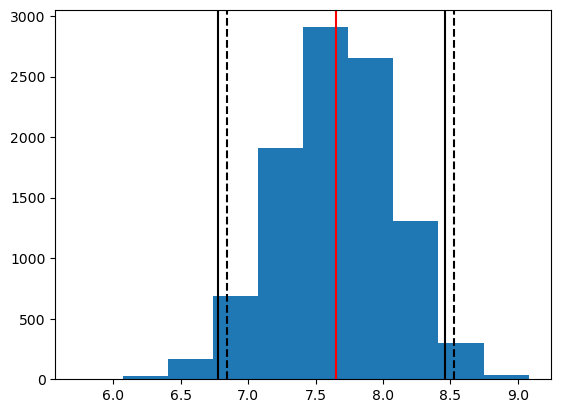

In [39]:
n_resamples = 10000

alpha = 0.05

sample_mean = np.mean(sample)
resample_means = np.zeros(n_resamples)

for i in range(n_resamples):
    # sample with replacement (replace = true by default, but I'm putting it here for emphasis)
    resample = np.random.choice(sample, len(sample), replace=True)

    resample_means[i] = np.mean(resample)

plt.hist(resample_means)
ymin, ymax = plt.gca().get_ylim()
plt.vlines(sample_mean, ymin, ymax, colors = 'r')

# basic bootstrap
plt.vlines([2*sample_mean-np.quantile(resample_means, alpha/2),
            2*sample_mean-np.quantile(resample_means, 1-alpha/2)],
            ymin, ymax, colors = 'k', linestyles='--')

# percentile bootstrap
plt.vlines(np.quantile(resample_means,[alpha/2,1-alpha/2]), ymin, ymax, colors = 'k')

plt.ylim([ymin, ymax])



In [36]:
2*sample_mean-np.quantile(resample_means,alpha/2)

8.529037499999998

In [37]:
2*sample_mean-np.quantile(resample_means, 1-alpha/2)

6.8554999999999975